In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from sklearn.metrics import confusion_matrix
from keras import backend as K
from keras.layers import LeakyReLU
import keras
from sklearn.preprocessing import LabelEncoder

Now take your Keras skills and go build another neural network. Pick your data set, but it should be one of abstract types, possibly even nonnumeric, and use Keras to make five implementations of your network. Compare them both in computational complexity as well as in accuracy and given that tradeoff decide which one you like best.

Your dataset should be sufficiently large for a neural network to perform well (samples should really be in the thousands here) and try to pick something that takes advantage of neural networks’ ability to have both feature extraction and supervised capabilities, so don’t pick something with an easy to consume list of features already generated for you (though neural networks can still be useful in those contexts).

Note that if you want to use an unprocessed image dataset, scikit-image is a useful package for converting to importable numerics.

In [16]:
x = []
y = []

for dirname, _, filenames in os.walk('intel-image-classification/seg_test'):
    for filename in filenames:
        file = (os.path.join(dirname, filename))
        img = cv2.imread(file, cv2.IMREAD_COLOR)
        if img is not None:
            img = np.asarray(img)
            label = file.split('/')[-2]
            x.append(img)
            y.append(label)
            
x_test = x
y_test = y

In [17]:
x = []
y = []

for dirname, _, filenames in os.walk('intel-image-classification/seg_train'):
    for filename in filenames:
        file = (os.path.join(dirname, filename))
        img = cv2.imread(file, cv2.IMREAD_COLOR)
        if img is not None:
            img = np.asarray(img)
            label = file.split('/')[-2]
            x.append(img)
            y.append(label)

## Image Samples

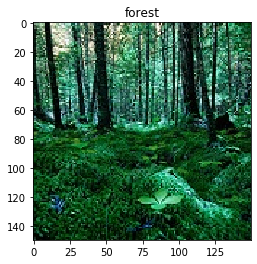

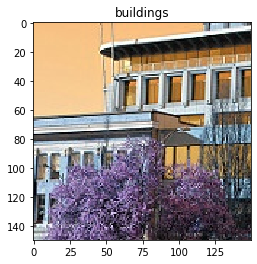

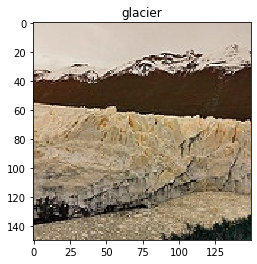

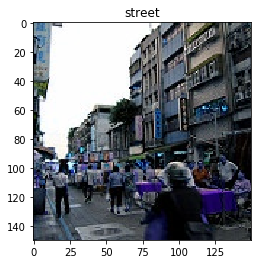

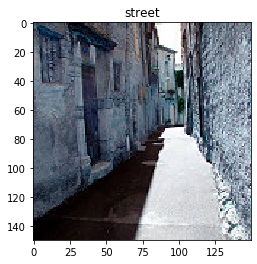

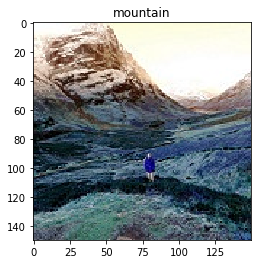

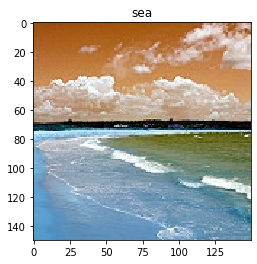

In [18]:
x_train = x
y_train = y
for i in (1, 3000, 5000, 7000, 9000, 11000, 13000):
    sample = np.reshape(x_train[i]/255, (150, 150, 3))
    plt.title(y_train[i])
    plt.imshow(sample)
    plt.show()

In [19]:
LE = LabelEncoder()
y_train = LE.fit_transform(y_train)
y_train = keras.utils.to_categorical(y_train, 6)

## Weights

In [20]:
from sklearn.utils import class_weight
classweight = class_weight.compute_class_weight('balanced', np.unique(y), y)
print(classweight)

[1.06754906 1.02994276 0.97296173 0.93113057 1.02858399 0.98194794]


Looks like the classes are evenly weighted enough for our purposes

## Data Generators

In [2]:
datagen = ImageDataGenerator(
    rotation_range = 180,
    shear_range = .2,
    zoom_range = .2,
    horizontal_flip = True,
    rescale = 1/255,
    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(rescale = 1/255)
if K.image_data_format() == 'channels_first':
    input_shape = (3, 150, 150)
else:
    input_shape = (150, 150, 3)

In [3]:
train = datagen.flow_from_directory('intel-image-classification/seg_train/seg_train/',
                                    target_size = (150, 150),
                                    batch_size = 64,
                                    class_mode = 'categorical')
test = test_datagen.flow_from_directory('intel-image-classification/seg_test/seg_test',
                                        target_size = (150, 150),
                                        batch_size = 64,
                                        class_mode = 'categorical')

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


## Dense

In [4]:
model = Sequential()
model.add(Flatten(input_shape = input_shape))

model.add(Dense(64))
model.add(LeakyReLU(alpha = .3))
model.add(Dropout(.1))

model.add(Dense(64))
model.add(LeakyReLU(alpha = .3))
model.add(Dropout(.1))

model.add(Dense(64))
model.add(LeakyReLU(alpha = .3))
model.add(Dropout(.1))

model.add(Dense(64))
model.add(LeakyReLU(alpha = .3))
model.add(Dropout(.1))

model.add(Dense(64))
model.add(LeakyReLU(alpha = .3))
model.add(Dropout(.1))

model.add(Dense(64))
model.add(LeakyReLU(alpha = .3))
model.add(Dropout(.1))

model.add(Dense(64))
model.add(LeakyReLU(alpha = .3))
model.add(Dropout(.1))

model.add(Dense(64))
model.add(LeakyReLU(alpha = .3))
model.add(Dropout(.1))

model.add(Dense(64))
model.add(LeakyReLU(alpha = .3))
model.add(Dropout(.1))

model.add(Dense(6))
model.add(Activation('sigmoid'))
model.compile(loss = 'categorical_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

model.summary()





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 67500)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4320064   
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 64)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 64)                0         

In [5]:
model.fit_generator(train,
                    steps_per_epoch = 14034 // 64,
                    epochs = 5,
                    verbose=1,
                    validation_data = test,
                    validation_steps = 3000 // 64)

score = model.evaluate(test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/5
219/219 [==============================] - 155s 710ms/step - loss: 1.8002 - acc: 0.1657 - val_loss: 1.7918 - val_acc: 0.1457
Epoch 2/5
219/219 [==============================] - 61s 277ms/step - loss: 1.7918 - acc: 0.1595 - val_loss: 1.7918 - val_acc: 0.1485
Epoch 3/5
219/219 [==============================] - 61s 278ms/step - loss: 1.7918 - acc: 0.1564 - val_loss: 1.7918 - val_acc: 0.1465
Epoch 4/5
219/219 [==============================] - 60s 275ms/step - loss: 1.7918 - acc: 0.1561 - val_loss: 1.7918 - val_acc: 0.1407
Epoch 5/5
219/219 [==============================] - 60s 275ms/step - loss: 1.7918 - acc: 0.1566 - val_loss: 1.7918 - val_acc: 0.1485
Test loss: 1.7917594909667969
Test accuracy: 0.1456666667064031


## Convolutional Neural Network #1

In [9]:
model = Sequential()

model.add(Conv2D(32, kernel_size = (3, 3), input_shape = input_shape))
model.add(LeakyReLU(alpha = .2))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(.1))

model.add(Conv2D(32, kernel_size = (3, 3)))
model.add(LeakyReLU(alpha = .2))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(.1))

model.add(Conv2D(32, kernel_size = (3, 3)))
model.add(LeakyReLU(alpha = .2))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(.1))

model.add(Flatten())
model.add(Dense(64))
model.add(LeakyReLU(alpha = .2))
model.add(Dropout(.1))

model.add(Dense(6))
model.add(Activation('softmax'))

model.compile(loss = 'categorical_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
leaky_re_lu_19 (LeakyReLU)   (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
leaky_re_lu_20 (LeakyReLU)   (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 32)      

In [21]:
model.fit_generator(train,
                    steps_per_epoch = 14034 // 64,
                    epochs = 5,
                    verbose=1,
                    validation_data = test,
                    validation_steps = 3000 // 64)

score = model.evaluate(test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/5
219/219 [==============================] - 176s 802ms/step - loss: 1.3138 - acc: 0.4582 - val_loss: 1.2402 - val_acc: 0.5438
Epoch 2/5
219/219 [==============================] - 165s 753ms/step - loss: 1.1121 - acc: 0.5685 - val_loss: 1.1189 - val_acc: 0.5685
Epoch 3/5
219/219 [==============================] - 162s 740ms/step - loss: 1.0317 - acc: 0.6107 - val_loss: 1.0385 - val_acc: 0.6168
Epoch 4/5
219/219 [==============================] - 164s 750ms/step - loss: 0.9856 - acc: 0.6314 - val_loss: 0.9998 - val_acc: 0.6308
Epoch 5/5
219/219 [==============================] - 173s 789ms/step - loss: 0.9418 - acc: 0.6484 - val_loss: 1.0023 - val_acc: 0.6362
Test loss: 1.0005600182215373
Test accuracy: 0.6396666666666667


## Convolutional Neural Network #2

In [44]:
model = Sequential()

model.add(Conv2D(32, kernel_size = (3, 3), input_shape = input_shape))
model.add(LeakyReLU(alpha = .2))
model.add(Conv2D(32, kernel_size = (3, 3)))
model.add(LeakyReLU(alpha = .2))
model.add(Dense(32))
model.add(LeakyReLU(alpha = .2))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(.1))

model.add(Conv2D(64, kernel_size = (3, 3)))
model.add(LeakyReLU(alpha = .2))
model.add(Conv2D(64, kernel_size = (3, 3)))
model.add(LeakyReLU(alpha = .2))
model.add(Dense(64))
model.add(LeakyReLU(alpha = .2))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(.1))

model.add(Flatten())
model.add(Dense(128))
model.add(LeakyReLU(alpha = .2))
model.add(Dropout(.1))

model.add(Dense(6))
model.add(Activation('softmax'))

model.compile(loss = 'categorical_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
leaky_re_lu_50 (LeakyReLU)   (None, 148, 148, 32)      0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 146, 146, 32)      9248      
_________________________________________________________________
leaky_re_lu_51 (LeakyReLU)   (None, 146, 146, 32)      0         
_________________________________________________________________
dense_39 (Dense)             (None, 146, 146, 32)      1056      
_________________________________________________________________
leaky_re_lu_52 (LeakyReLU)   (None, 146, 146, 32)      0         
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 73, 73, 32)       

In [45]:
model.fit_generator(train,
                    steps_per_epoch = 14034 // 64,
                    epochs = 5,
                    verbose=1,
                    validation_data = test,
                    validation_steps = 3000 // 64)

score = model.evaluate(test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/5
219/219 [==============================] - 488s 2s/step - loss: 1.2564 - acc: 0.4968 - val_loss: 1.3378 - val_acc: 0.5105
Epoch 2/5
219/219 [==============================] - 483s 2s/step - loss: 1.0536 - acc: 0.5983 - val_loss: 1.1069 - val_acc: 0.5981
Epoch 3/5
219/219 [==============================] - 475s 2s/step - loss: 0.9734 - acc: 0.6302 - val_loss: 0.9224 - val_acc: 0.6495
Epoch 4/5
219/219 [==============================] - 478s 2s/step - loss: 0.9175 - acc: 0.6534 - val_loss: 0.9899 - val_acc: 0.6448
Epoch 5/5
219/219 [==============================] - 473s 2s/step - loss: 0.8994 - acc: 0.6597 - val_loss: 1.0676 - val_acc: 0.6107
Test loss: 1.0689894169171652
Test accuracy: 0.6083333328564962


## VGG16

In [28]:
from keras.applications.vgg16 import VGG16

model = VGG16(include_top=False, input_shape=(150, 150, 3))
x = model.output
x = Flatten()(x)
x = Dense(6, activation='softmax')(x)

model = Model(inputs=model.input, outputs=x)

print(model.summary())

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0   

In [29]:
# freezing the top 18 layers to expedite this training
for layer in model.layers[0:18]:
    layer.trainable=False

In [30]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit_generator(train,
                    steps_per_epoch = 14034 // 64,
                    epochs = 5,
                    verbose=1,
                    validation_data = test,
                    validation_steps = 3000 // 64)

score = model.evaluate(test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/5
219/219 [==============================] - 514s 2s/step - loss: 0.7108 - acc: 0.7301 - val_loss: 0.5492 - val_acc: 0.7952
Epoch 2/5
219/219 [==============================] - 519s 2s/step - loss: 0.5663 - acc: 0.7897 - val_loss: 0.5094 - val_acc: 0.8171
Epoch 3/5
219/219 [==============================] - 520s 2s/step - loss: 0.5304 - acc: 0.8045 - val_loss: 0.5202 - val_acc: 0.8089
Epoch 4/5
219/219 [==============================] - 522s 2s/step - loss: 0.5177 - acc: 0.8087 - val_loss: 0.4794 - val_acc: 0.8174
Epoch 5/5
219/219 [==============================] - 522s 2s/step - loss: 0.5090 - acc: 0.8133 - val_loss: 0.4827 - val_acc: 0.8246
Test loss: 0.47816676783561707
Test accuracy: 0.8226666663487753


## ResNet50

In [62]:
from keras.applications.resnet50 import ResNet50

model = ResNet50(include_top=False, input_shape=(150, 150, 3))
x = model.output
x = Dropout(.5)(x)
x = Dense(128)(x)
x = LeakyReLU(alpha = .3)(x)
x = Dropout(.5)(x)
x = Dense(128)(x)
x = LeakyReLU(alpha = .3)(x)
x = MaxPooling2D(pool_size = (2, 2))(x)
x = Flatten()(x)
x = Dense(6, activation='softmax')(x)

model = Model(inputs=model.input, outputs=x)

print(model.summary())

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


Model: "model_8"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_14 (InputLayer)           (None, 150, 150, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 156, 156, 3)  0           input_14[0][0]                   
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 75, 75, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 75, 75, 64)   256         conv1[0][0]                      
____________________________________________________________________________________________

In [65]:
# freezing the first 175 layers to expedite this training
for layer in model.layers[0:175]:
    layer.trainable=False

In [64]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit_generator(train,
                    steps_per_epoch = 14034 // 64,
                    epochs = 5,
                    verbose=1,
                    validation_data = test,
                    validation_steps = 3000 // 64)

score = model.evaluate(test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/5
219/219 [==============================] - 428s 2s/step - loss: 1.2073 - acc: 0.6687 - val_loss: 2.0351 - val_acc: 0.1753
Epoch 2/5
219/219 [==============================] - 18862s 86s/step - loss: 0.7047 - acc: 0.7726 - val_loss: 1.9895 - val_acc: 0.1689
Epoch 3/5
219/219 [==============================] - 43747s 200s/step - loss: 0.6497 - acc: 0.7821 - val_loss: 1.9205 - val_acc: 0.1744
Epoch 4/5
219/219 [==============================] - 16349s 75s/step - loss: 0.5548 - acc: 0.8034 - val_loss: 1.8818 - val_acc: 0.1754
Epoch 5/5
219/219 [==============================] - 438s 2s/step - loss: 0.5048 - acc: 0.8197 - val_loss: 1.9744 - val_acc: 0.1669
Test loss: 1.9721158822377522
Test accuracy: 0.17066666662693022


## Conclusion

Of all the models here presented, the dense network is by far the worst. It had a lowly 15% accuracy (with 6 classes, that means it was basically guessing). The first convolutional neural network did better at 63.5% accuracy, and it was only a little lower than the dense network.

Surprisingly, the second CNN somehow performed worse, and it was very slow. It seems adding more layers does not always help.

Coming in strong was the VGG16 pre-trained model. It had 82% accuracy, but was very slow. Better yet for training accuracy was the ResNet50 model, which had high 80s accuracy, but high teens validation accuracy. For some reason the ResNet50 is hugely overfit to the training data.

The VGG16 performs the best. The accuracy blows the other models' accuracy out of the water, and the speed is low enough.